### Superstore Data Analysis EDA 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\DS SM\PortfolioProjects\SuperstoreDataAnalysis\Sample.csv", encoding="ISO-8859-1")

### Understand the Data

In [3]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
print(df.describe(include="object"))

              Order ID Order Date   Ship Date       Ship Mode Customer ID  \
count             9994       9994        9994            9994        9994   
unique            5009       1237        1334               4         793   
top     CA-2017-100111   9/5/2016  12/16/2015  Standard Class    WB-21850   
freq                14         38          35            5968          37   

        Customer Name   Segment        Country           City       State  \
count            9994      9994           9994           9994        9994   
unique            793         3              1            531          49   
top     William Brown  Consumer  United States  New York City  California   
freq               37      5191           9994            915        2001   

       Region       Product ID         Category Sub-Category     Product Name  
count    9994             9994             9994         9994             9994  
unique      4             1862                3           17        

### Top Selling products

In [9]:
top_products = df[['Product Name','Sales']]
top_products = top_products.groupby('Product Name', as_index=False)['Sales'].sum()
top_products = top_products.sort_values(by = 'Sales', ascending = False)
top_products.head()

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
786,HON 5400 Series Task Chairs for Big and Tall,21870.576
686,GBC DocuBind TL300 Electric Binding System,19823.479


#### Box plot for key numerical columns

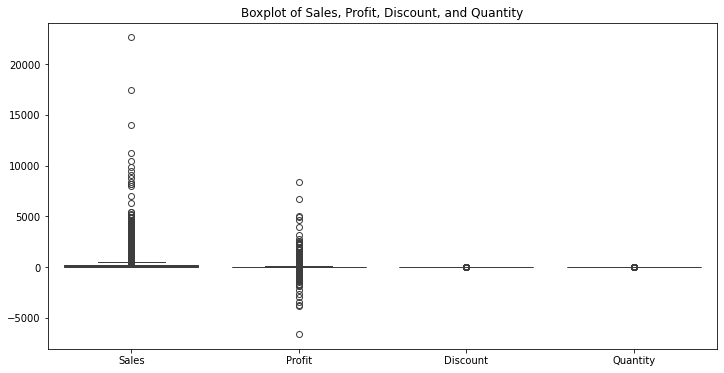

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Sales', 'Profit', 'Discount', 'Quantity']])
plt.title("Boxplot of Sales, Profit, Discount, and Quantity")
plt.show()

In [11]:
# Function to detect outliers using IQR
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Find outliers in Sales, Profit
sales_outliers = detect_outliers("Sales")
profit_outliers = detect_outliers("Profit")

print(f"Sales Outliers: {sales_outliers.shape[0]}")
print(f"Profit Outliers: {profit_outliers.shape[0]}")

Sales Outliers: 1167
Profit Outliers: 1881


### Identifying Patterns & Trends
#### Correlation Heatmap

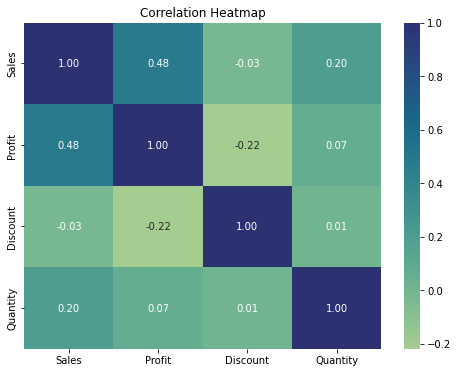

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap="crest", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Sales & Profit Trends Over Time

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15952\381605987.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').sum()[['Sales', 'Profit']].plot(figsize=(12,6), title="Monthly Sales & Profit Trends")


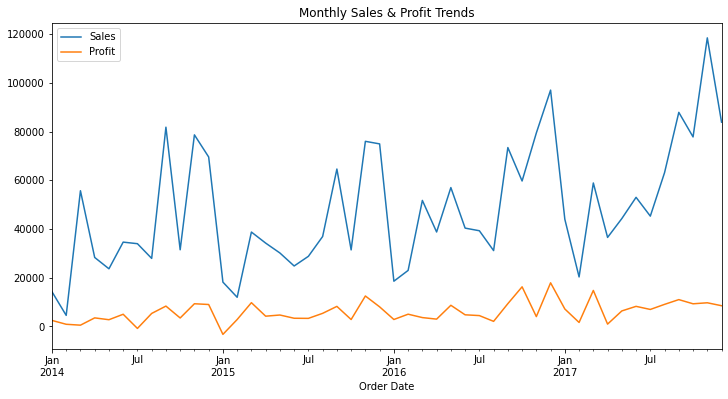

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

df.resample('M').sum()[['Sales', 'Profit']].plot(figsize=(12,6), title="Monthly Sales & Profit Trends")
plt.show()

#### Best-Selling Categories

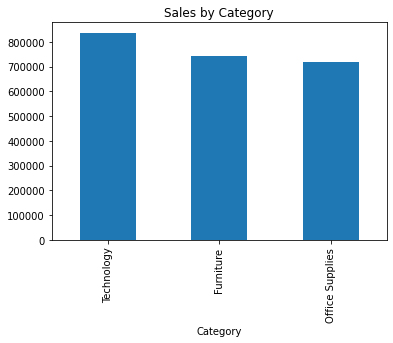

In [14]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', title="Sales by Category")
plt.show()

### Impact of discounts and promotions on quantity sold

In [15]:
dis_df = df[['Discount', 'Quantity']]
dis_df = dis_df.groupby(dis_df['Discount']).sum().reset_index()
dis_df.head()

,Discount,Quantity
0,0.00,18267
1,0.10,373
2,0.15,198
3,0.20,13660
4,0.30,849


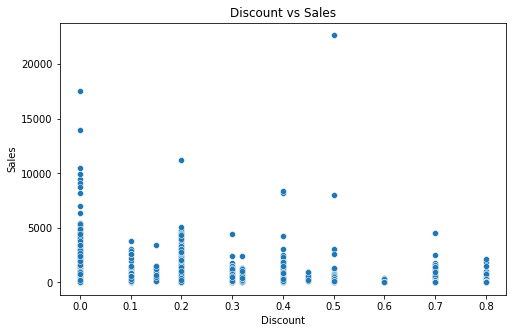

          Discount    Sales
Discount   1.00000 -0.02819
Sales     -0.02819  1.00000


In [17]:
# Scatter plot to visualize relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Discount'], y=df['Sales'])
plt.title("Discount vs Sales")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.show()

# Calculate correlation
correlation = df[['Discount', 'Sales']].corr()
print(correlation)

### Top 10 Sub-Category by Quantity sold

In [21]:
top_subcats = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).head(10)

# Display the result
print(top_subcats)

Sub-Category
Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Art            3000
Accessories    2976
Chairs         2356
Appliances     1729
Labels         1400
Name: Quantity, dtype: int64


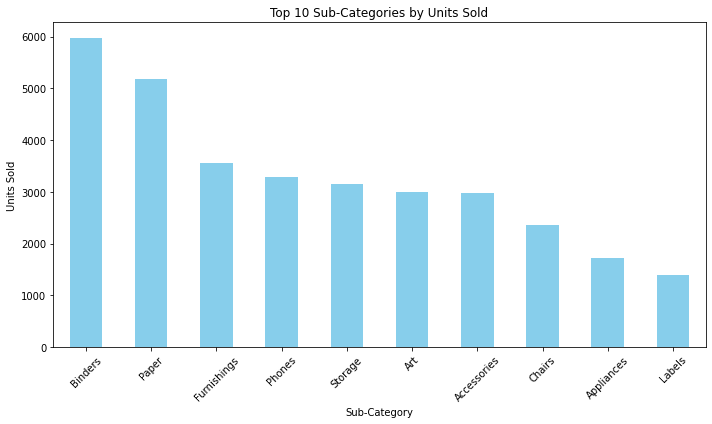

In [23]:
# Optional: Plot it
import matplotlib.pyplot as plt

top_subcats.plot(kind='bar', figsize=(10, 6), title='Top 10 Sub-Categories by Units Sold', color='skyblue')
plt.ylabel('Units Sold')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
